In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

# 1) 4-qubit UQC encoding

Up until now, I was using continuous encoding to preprocess the state-space of cartpole that is fed to the VQC. So, in practice, I was applying the arctan to each feature of the vector input, effectively normalizing it to be between $0$ and $2\pi$. However, this might not make much sense here as the angle of the rotation is obtained by calculating the dot product between the input vector and some weights plus a bias. So, in this notebook, we are going to test different types of encoding and see how the performance is affected.

In [4]:
continuous_encoding_path = "../../results/uqc_encoding/4qubits_continuous_encoding"
scaled_continuous_encoding_path = "../../results/uqc_encoding/4qubits_scaled_continuous_encoding"
nothing_encoding_path = "../../results/uqc_encoding/4qubits_nothing_encoding"

continuous_encoding = Analysis(continuous_encoding_path)
scaled_continuous_encoding = Analysis(scaled_continuous_encoding_path)
nothing_encoding = Analysis(nothing_encoding_path)

In [11]:
continuous_encoding_return = continuous_encoding.get_rewards()
scaled_continuous_encoding_return = scaled_continuous_encoding.get_rewards()
nothing_encoding_return = nothing_encoding.get_rewards()

continuous_encoding_mean = np.mean(continuous_encoding_return, axis = 0)
scaled_continuous_encoding_mean = np.mean(scaled_continuous_encoding_return, axis = 0)
nothing_encoding_mean = np.mean(nothing_encoding_return, axis = 0)

continuous_encoding_std = np.std(continuous_encoding_return, axis = 0)
scaled_continuous_encoding_std = np.std(scaled_continuous_encoding_return, axis = 0)
nothing_encoding_std = np.std(nothing_encoding_return, axis = 0)

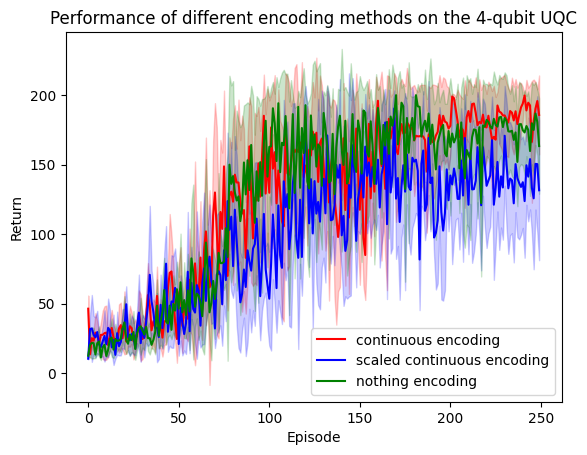

In [12]:
plt.plot(continuous_encoding_mean,color = "red", label="continuous encoding")
plt.plot(scaled_continuous_encoding_mean,color = "blue", label="scaled continuous encoding")
plt.plot(nothing_encoding_mean,color = "green", label="nothing encoding")
plt.fill_between(range(len(continuous_encoding_mean)), continuous_encoding_mean - continuous_encoding_std, continuous_encoding_mean + continuous_encoding_std, color='red', alpha=0.2)
plt.fill_between(range(len(scaled_continuous_encoding_mean)), scaled_continuous_encoding_mean - scaled_continuous_encoding_std, scaled_continuous_encoding_mean + scaled_continuous_encoding_std, color='blue', alpha=0.2)
plt.fill_between(range(len(nothing_encoding_mean)), nothing_encoding_mean - nothing_encoding_std, nothing_encoding_mean + nothing_encoding_std, color='green', alpha=0.2)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Performance of different encoding methods on the 4-qubit UQC")
plt.legend()
plt.show()
